# Neural Networks Project

In [12]:
import pandas as pd
import numpy as np

import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout

import random
from tensorflow.keras import backend

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.pyplot as plt
from skimage.transform import resize
import seaborn as sns

import h5py

from google.colab import drive
drive.mount('/content/drive')

import warnings
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Domain Electronics and Telecommunication
CONTEXT: A communications equipment manufacturing company has a product which is responsible for emitting informative signals.
Company wants to build a machine learning model which can help the company to predict the equipment’s signal quality using various
parameters.

**PROJECT OBJECTIVE**: To build a classifier which can use the given parameters to determine the signal strength or quality.

## Reading the data

In [2]:
# Data import and Understanding
# Read the ‘Signals.csv’ as DataFrame and import required libraries.

Data = pd.read_csv('/content/drive/My Drive/AIML/Neural Network and Deep Learning/project/Signal.csv')

print("df shape =", Data.shape)
print("df head =", Data.head())

df shape = (1599, 12)
df head =    Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
0          7.4         0.70         0.00          1.9        0.076   
1          7.8         0.88         0.00          2.6        0.098   
2          7.8         0.76         0.04          2.3        0.092   
3         11.2         0.28         0.56          1.9        0.075   
4          7.4         0.70         0.00          1.9        0.076   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
0         11.0         34.0       0.9978         3.51          0.56   
1         25.0         67.0       0.9968         3.20          0.68   
2         15.0         54.0       0.9970         3.26          0.65   
3         17.0         60.0       0.9980         3.16          0.58   
4         11.0         34.0       0.9978         3.51          0.56   

   Parameter 11  Signal_Strength  
0           9.4                5  
1           9.8                5  
2           9.8

In [3]:
# Check for missing values and print percentage for each attribute.
print("df info =", Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Parameter 1      1599 non-null   float64
 1   Parameter 2      1599 non-null   float64
 2   Parameter 3      1599 non-null   float64
 3   Parameter 4      1599 non-null   float64
 4   Parameter 5      1599 non-null   float64
 5   Parameter 6      1599 non-null   float64
 6   Parameter 7      1599 non-null   float64
 7   Parameter 8      1599 non-null   float64
 8   Parameter 9      1599 non-null   float64
 9   Parameter 10     1599 non-null   float64
 10  Parameter 11     1599 non-null   float64
 11  Signal_Strength  1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
df info = None


In [5]:
# check for missing values in the data
missing_percentage = (Data.isnull().sum() / len(Data)) * 100
print("Missing Value Percentage: \n" , missing_percentage)


Missing Value Percentage: 
 Parameter 1        0.0
Parameter 2        0.0
Parameter 3        0.0
Parameter 4        0.0
Parameter 5        0.0
Parameter 6        0.0
Parameter 7        0.0
Parameter 8        0.0
Parameter 9        0.0
Parameter 10       0.0
Parameter 11       0.0
Signal_Strength    0.0
dtype: float64


In [6]:
# Check for presence of duplicate records in the dataset and impute with appropriate method.

duplicate_rows = Data[Data.duplicated()]
print("Number of Duplicate Rows:", len(duplicate_rows))
Data = Data.drop_duplicates()

print("df shape =", Data.shape)

Number of Duplicate Rows: 240
df shape = (1359, 12)


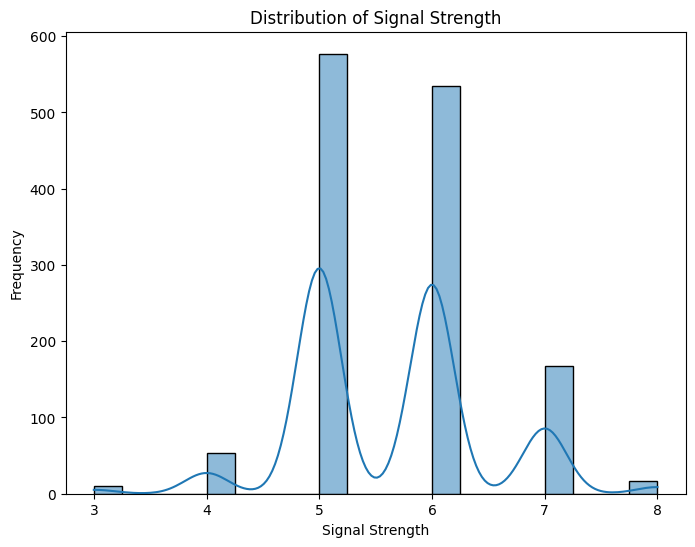

In [7]:
# D. Visualise distribution of the target variable.
plt.figure(figsize=(8, 6))
sns.histplot(Data['Signal_Strength'], bins=20, kde=True)
plt.title("Distribution of Signal Strength")
plt.xlabel("Signal Strength")
plt.ylabel("Frequency")
plt.show()

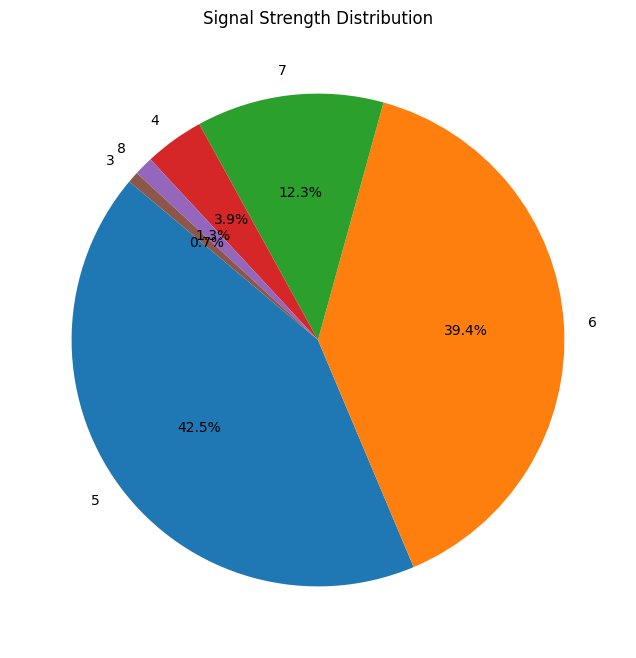

In [9]:
# Visualise distribution of the target variable.
value_counts = Data["Signal_Strength"].value_counts()
# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
# Add a title
plt.title('Signal Strength Distribution')
# Display the pie chart
plt.show()

In [10]:
# Checking 5-point summary of the new DataFrame.
Data.describe()

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Parameter 1'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['Parameter 2'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['Parameter 3'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['Parameter 4'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['Parameter 1'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['Parameter 2'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['Parameter 3'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['Parameter 4'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 10 * figscale, 10 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['Parameter 1', 'Parameter 2'], ['Parameter 2', 'Parameter 3'], ['Parameter 3', 'Parameter 4'], ['Parameter 4', 'Parameter 5']]], **{})
chart

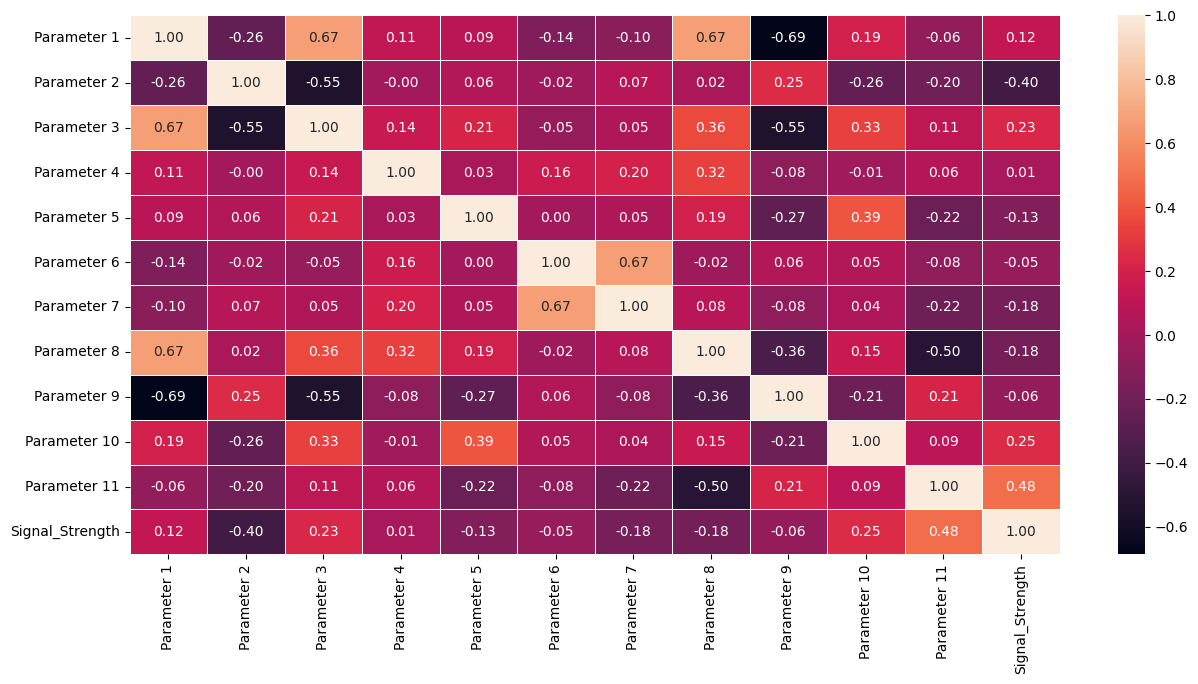

In [11]:
# Visualize a heatmap to understand correlation between all features
plt.figure(figsize=(15,7))
sns.heatmap(Data.corr(), annot=True, linewidths=.5, fmt= '.2f')
plt.show();

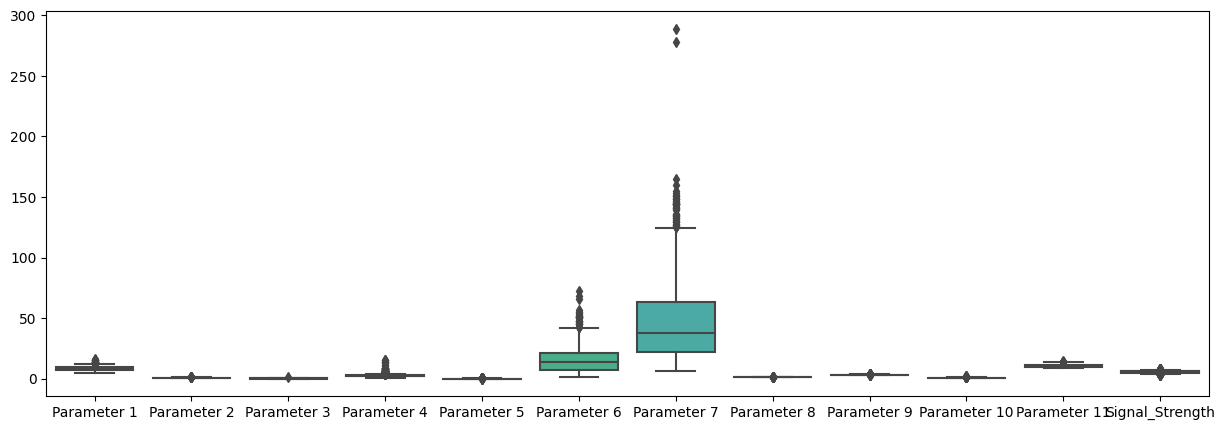

In [12]:
fig, ax = plt.subplots(figsize=(15, 5))
sns.boxplot(data=Data, ax=ax);


  **No Missing Values:** The dataset does not contain any missing values. This is evident from the fact that the missing value percentage for each attribute is 0%.

  **Duplicate Records:** After checking for duplicate records, it appears that there are 240 duplicate rows in the dataset. we dropped that record from the dataset.

  **Corelation:** target valiable is having postive correlation with parameter 11 and negative correlation with parameter 2

In [13]:
## Split the data into X & Y.
X = Data.drop(['Signal_Strength'],axis=1)
Y = Data[['Signal_Strength']]

In [14]:
# Split the data into train & test with 70:30 proportion.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 42,stratify = Y)


In [15]:
# Print shape of all the 4 variables and verify if train and test data is in sync.
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (951, 11)
y_train shape: (951, 1)
X_test shape: (408, 11)
y_test shape: (408, 1)


In [17]:
# Verify if train and test data shapes are in sync

print("Train data and target data shapes are not in sync. = ", X_train.shape[0] == y_train.shape[0])
print("Test data and target data shapes are not in sync. = ", X_test.shape[0] == y_test.shape[0])


Train data and target data shapes are not in sync. =  True
Test data and target data shapes are not in sync. =  True


In [18]:
# Normalize train and test data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
# Transform labels into a format acceptable by Neural Network
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(y_train)
Y_test_encoded = label_encoder.transform(y_test)

In [20]:
# Design a Neural Network architecture
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

In [21]:
# Train the classifier
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, Y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))



Epoch 1/20
30/30 [==============================] - 6s 13ms/step - loss: 1.5931 - accuracy: 0.3512 - val_loss: 1.3159 - val_accuracy: 0.4902
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 1.1953 - accuracy: 0.5468 - val_loss: 1.1328 - val_accuracy: 0.5466
Epoch 3/20
30/30 [==============================] - 0s 5ms/step - loss: 1.0727 - accuracy: 0.5794 - val_loss: 1.0818 - val_accuracy: 0.5441
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 1.0229 - accuracy: 0.5952 - val_loss: 1.0594 - val_accuracy: 0.5588
Epoch 5/20
30/30 [==============================] - 0s 8ms/step - loss: 0.9892 - accuracy: 0.6025 - val_loss: 1.0421 - val_accuracy: 0.5760
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.9682 - accuracy: 0.6088 - val_loss: 1.0314 - val_accuracy: 0.5637
Epoch 7/20
30/30 [==============================] - 0s 7ms/step - loss: 0.9505 - accuracy: 0.6215 - val_loss: 1.0218 - val_accuracy: 0.5588
Epoch 8/20
30/30 [=

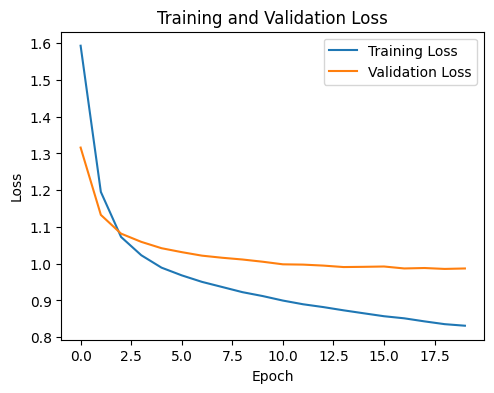

In [22]:
# Plot Training Loss and Validation Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

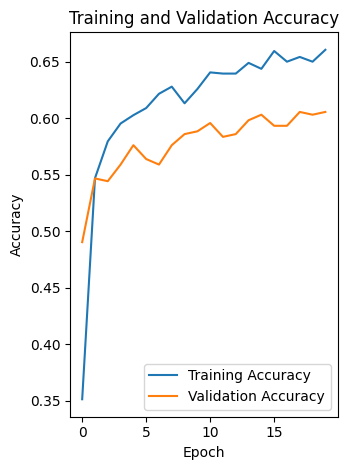

In [23]:
# Plot Training Accuracy and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# Design a new architecture or update the existing architecture
new_model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(256, activation='relu'),  # Increase the number of neurons
    Dropout(0.1),  # Add dropout for regularization
    Dense(128, activation='relu'),  # Increase the number of neurons
    Dropout(0.1),  # Add dropout for regularization
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])


In [40]:
# Train the updated classifier
new_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
new_history = new_model.fit(X_train_scaled, Y_train_encoded, epochs=20, batch_size=32, validation_data=(X_test_scaled, Y_test_encoded))


Epoch 1/20
30/30 [==============================] - 2s 11ms/step - loss: 1.3163 - accuracy: 0.5268 - val_loss: 1.1022 - val_accuracy: 0.5441
Epoch 2/20
30/30 [==============================] - 0s 5ms/step - loss: 1.0577 - accuracy: 0.5615 - val_loss: 1.0646 - val_accuracy: 0.5417
Epoch 3/20
30/30 [==============================] - 0s 6ms/step - loss: 0.9914 - accuracy: 0.5899 - val_loss: 1.0375 - val_accuracy: 0.5515
Epoch 4/20
30/30 [==============================] - 0s 6ms/step - loss: 0.9702 - accuracy: 0.5952 - val_loss: 1.0343 - val_accuracy: 0.5711
Epoch 5/20
30/30 [==============================] - 0s 6ms/step - loss: 0.9544 - accuracy: 0.6172 - val_loss: 1.0214 - val_accuracy: 0.5515
Epoch 6/20
30/30 [==============================] - 0s 6ms/step - loss: 0.9184 - accuracy: 0.6141 - val_loss: 1.0365 - val_accuracy: 0.5539
Epoch 7/20
30/30 [==============================] - 0s 6ms/step - loss: 0.9020 - accuracy: 0.6204 - val_loss: 0.9985 - val_accuracy: 0.5833
Epoch 8/20
30/30 [=

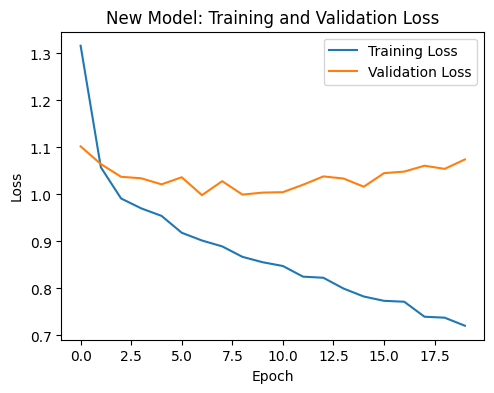

In [41]:
# Plot Training Loss and Validation Loss for the updated model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(new_history.history['loss'], label='Training Loss')
plt.plot(new_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('New Model: Training and Validation Loss')
plt.legend()

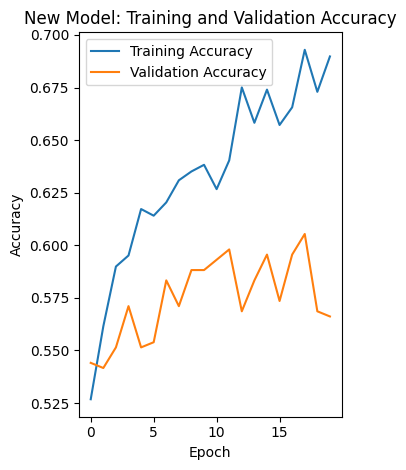

In [42]:
# Plot Training Accuracy and Validation Accuracy for the updated model
plt.subplot(1, 2, 2)
plt.plot(new_history.history['accuracy'], label='Training Accuracy')
plt.plot(new_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('New Model: Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Observations

**Training Performance:**

Model 1 achieved a training accuracy of approximately 66.04%. This means that, on the training data, the model made correct predictions for about 66.04% of the samples.

Model 2 achieved a slightly higher training accuracy of around 68.98%. This indicates that Model 2 performed slightly better on the training data compared to Model 1.

**Validation Performance:**

Model 1 achieved a validation accuracy of around 60.54%. This means that when evaluated on unseen validation data, the model made correct predictions for about 60.54% of the samples.

Model 2 had a lower validation accuracy of about 56.62%. This suggests that Model 1 performed better on the validation data compared to Model 2.

**Loss Values:**

Both models have higher validation losses compared to their training losses, which is common in training deep learning models. A higher validation loss could indicate some level of overfitting, where the model performs better on the training data but struggles to generalize to unseen data.

**Comparison:**
  
  Model 2 has a higher training accuracy and a lower validation accuracy compared to Model 1. This could indicate that Model 2 might be overfitting the training data more than Model 1.
  
  Model 1 seems to have a better trade-off between training and validation performance, as indicated by its closer training and validation accuracies.

# Part B
DOMAIN: Autonomous Vehicles

CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.
The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.
While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors

In [2]:
# Read the .h5 file and assign to a variable
h5_file_path = "/content/drive/My Drive/AIML/Neural Network and Deep Learning/project/Autonomous_Vehicles_SVHN_single_grey1.h5"

h5_file = h5py.File(h5_file_path, 'r')

In [3]:
# Print all the keys from the .h5 file
print("Keys in the .h5 file:", list(h5_file.keys()))

Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [4]:
# Split the data into X_train, X_test, Y_train, Y_test
X_train = h5_file['X_train'][:]
X_test = h5_file['X_test'][:]
Y_train = h5_file['y_train'][:]
Y_test = h5_file['y_test'][:]

# Close the .h5 file
h5_file.close()

# Print the shapes of the data arrays
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (42000, 32, 32)
X_test shape: (18000, 32, 32)
Y_train shape: (42000,)
Y_test shape: (18000,)


In [5]:
# Verify if train and test data shapes are in sync

print("Train data and target data shapes are not in sync. = ", X_train.shape[0] == Y_train.shape[0])
print("Test data and target data shapes are not in sync. = ", X_test.shape[0] == Y_test.shape[0])


Train data and target data shapes are not in sync. =  True
Test data and target data shapes are not in sync. =  True


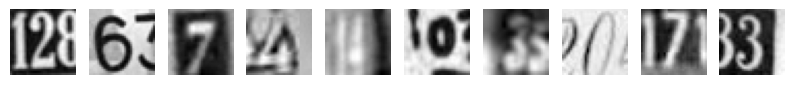

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [6]:
# Visualize first 10 images in train data and print corresponding labels
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
plt.show()
print('label for each of the above image: %s' % (Y_train[0:10]))


In [7]:
# Reshape all the images,
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
# Transform Labels into format acceptable by Neural Network

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)


In [10]:
# Print total number of classes in the Dataset
num_classes = len(label_encoder.classes_)
print("Total number of classes:", num_classes)


Total number of classes: 10


In [11]:
# Convert to "one-hot" vectors using the to_categorical function
y_train_one_hot = to_categorical(Y_train, num_classes)
y_test_one_hot = to_categorical(Y_test, num_classes)
print("First 5 training lables as one-hot encoded vectors:\n", y_train_one_hot[:5])

First 5 training lables as one-hot encoded vectors:
 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [13]:
# Design the Neural Network architecture
image_size=32*32

# create model
model_svhn = Sequential()

model_svhn.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(image_size,)))
model_svhn.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model_svhn.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_svhn.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model_svhn.add(Dropout(0.2))
model_svhn.add(BatchNormalization())
model_svhn.add(Dense(num_classes, activation='softmax'))

In [14]:
from tensorflow.keras import optimizers
# Compile model
adam = optimizers.Adam(learning_rate=1e-3)
model_svhn.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [15]:
model_svhn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 batch_normalization (BatchN  (None, 32)               128       
 ormalization)                                                   
                                                        

In [16]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor='val_accuracy',
                            save_weights_only=True, model='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,model='auto')

callbacks = [checkpoint,reduce_lr]

In [18]:
# Fit the model
history_svhn=model_svhn.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=20, batch_size=32, verbose=2, callbacks=callbacks)

Epoch 1/20

Epoch 1: saving model to model_weights_1.h5
1050/1050 - 4s - loss: 2.3022 - accuracy: 0.1033 - val_loss: 2.3028 - val_accuracy: 0.0993 - lr: 1.0000e-05 - 4s/epoch - 4ms/step
Epoch 2/20

Epoch 2: saving model to model_weights_1.h5
1050/1050 - 4s - loss: 2.3023 - accuracy: 0.1009 - val_loss: 2.2993 - val_accuracy: 0.0994 - lr: 1.0000e-05 - 4s/epoch - 4ms/step
Epoch 3/20

Epoch 3: saving model to model_weights_1.h5
1050/1050 - 9s - loss: 2.2990 - accuracy: 0.1121 - val_loss: 2.2983 - val_accuracy: 0.1237 - lr: 1.0000e-05 - 9s/epoch - 9ms/step
Epoch 4/20

Epoch 4: saving model to model_weights_1.h5
1050/1050 - 7s - loss: 2.2977 - accuracy: 0.1172 - val_loss: 2.2973 - val_accuracy: 0.1294 - lr: 1.0000e-05 - 7s/epoch - 7ms/step
Epoch 5/20

Epoch 5: saving model to model_weights_1.h5
1050/1050 - 9s - loss: 2.2965 - accuracy: 0.1210 - val_loss: 2.2961 - val_accuracy: 0.1332 - lr: 1.0000e-05 - 9s/epoch - 9ms/step
Epoch 6/20

Epoch 6: saving model to model_weights_1.h5
1050/1050 - 4s

In [19]:
# Evaluate performance of the model
evaluation = model_svhn.evaluate(X_test, y_test_one_hot)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

563/563 [==============================] - 3s 5ms/step - loss: 2.2416 - accuracy: 0.1802
Test Loss: 2.2416038513183594
Test Accuracy: 0.18016666173934937


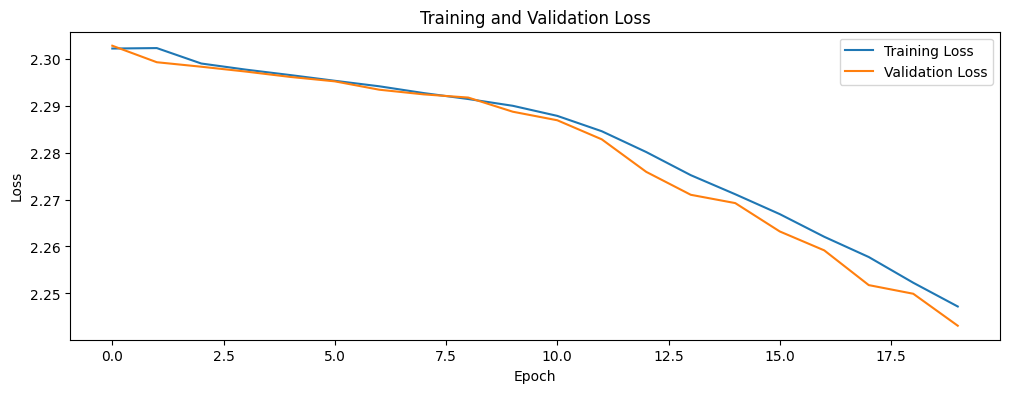

In [21]:
# Plot the training loss, validation loss vs number of epochs
plt.figure(figsize=(12, 4))
plt.plot(history_svhn.history['loss'], label='Training Loss')
plt.plot(history_svhn.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend();

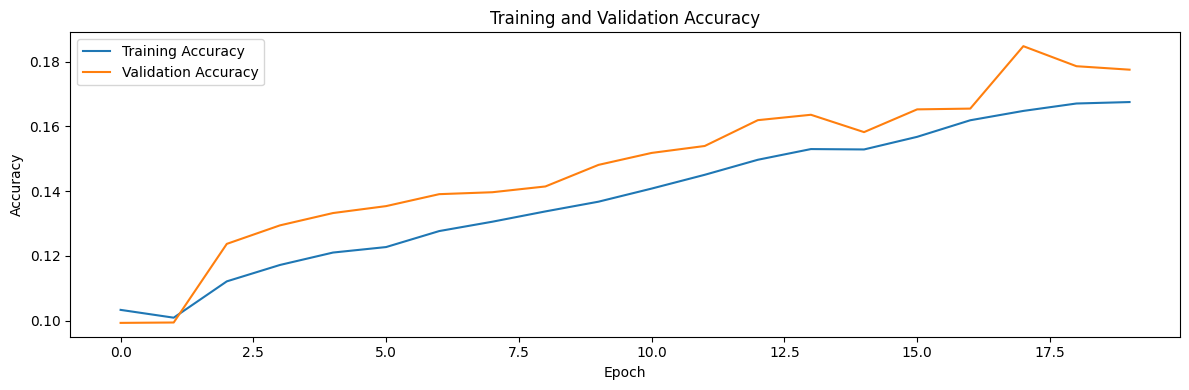

In [22]:
# Plot training accuracy, validation accuracy vs number of epochs
plt.figure(figsize=(12, 4))
plt.plot(history_svhn.history['accuracy'], label='Training Accuracy')
plt.plot(history_svhn.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show();

# Observations:

**Model Training & Validation Performance:**

The training accuracy is 16.75%, which means the model's predictions were correct for only a small fraction of the training data.

The validation accuracy is 17.75%, which is also quite low. This indicates that the model's poor performance is not limited to the training data; it's also not generalizing well to unseen validation data.

**Test Performance**:

The test accuracy is 18.02%, which aligns with the low training and validation accuracies. This means that the model's performance on the test data is similarly poor.

**Overall Model Performance:**
model performance across training, validation, and test data is consistently low in terms of both loss and accuracy.

The model seems to be having difficulty learning and generalizing patterns from the data.